In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import urllib.parse # url 인코딩 할 때 사용
import FinanceDataReader as fdr
import datetime
from pykrx import stock

In [4]:
kospi = fdr.StockListing('kospi')

In [6]:
kospi

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
6,152100,KOSPI,ARIRANG 200,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7,295820,KOSPI,ARIRANG 200동일가중,NaN,NaN,NaT,NaN,NaN,NaN,NaN
8,253150,KOSPI,ARIRANG 200선물레버리지,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7048,215620,KOSPI,흥국 S&P코리아로우볼,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7050,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
7051,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7052,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [10]:
comName = kospi[kospi['Name'] == input()]
comName

 삼성전자


,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
3501,005930,KOSPI,삼성전자,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [11]:
comNameStr = comName.iloc[0][2]
comNameStr

'삼성전자'

In [12]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}
DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

def zeroFill(columnValue):

    columnValue = str(columnValue)

    outValue = columnValue.zfill(6) # zfill : 빈 자리는 0으로 채워라

    return outValue

def get_stock_codes(market=None, delisted=False):

    params = {'method': 'download'} # url 구성 (~?method=downroad 대충 이런식) 맞춰주려고

    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가

        params['marketType'] = MARKET_CODE_DICT[market]

        print(market.lower()+" market key is exist")

    else:

        print("invalid market")

    # make url  key=value & key = value

    params_string = urllib.parse.urlencode(params)

    request_url = DOWNLOAD_URL+"?"+params_string # 쿼리 스트링

    df = pd.read_html(request_url)[0]

    df["종목코드"] = df.종목코드.apply(zeroFill)
#     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
 
    return df

stocks = get_stock_codes('kospi')
comName = input("회사명 : ")
result = stocks[stocks['회사명']==comName].iloc[0]['종목코드']
result

kospi market key is exist


회사명 :  삼성전자


'005930'

In [13]:
stockYear = input()

 2021


In [14]:
stockData = fdr.DataReader(result, stockYear)
stockData

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2021-06-04,82700,82700,81500,82200,18112259,-0.007246
2021-06-07,82700,82800,81600,81900,16496197,-0.003650
2021-06-08,82300,82600,81800,81900,12781226,0.000000


In [15]:
stockData.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-05-28', '2021-05-31', '2021-06-01', '2021-06-02',
               '2021-06-03', '2021-06-04', '2021-06-07', '2021-06-08',
               '2021-06-09', '2021-06-10'],
              dtype='datetime64[ns]', name='Date', length=109, freq=None)

In [16]:
df = stock.get_market_ohlcv_by_date("20201229", "20201230", "005930")
df["전날거래량"] = df["거래량"].shift(1)
df

,시가,고가,저가,종가,거래량,전날거래량
날짜,,,,,,
2020-12-29,78800,78900,77300,78300,30339449,NaN
2020-12-30,77400,81300,77300,81000,29417421,30339449.0


In [17]:
df.fillna(method='bfill')

,시가,고가,저가,종가,거래량,전날거래량
날짜,,,,,,
2020-12-29,78800,78900,77300,78300,30339449,30339449.0
2020-12-30,77400,81300,77300,81000,29417421,30339449.0


In [15]:
stockData

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691,2021,1,4
2021-01-05,81600,83900,81600,83900,35335669,0.010843,2021,1,5
2021-01-06,83300,84500,82100,82200,42089013,-0.020262,2021,1,6
2021-01-07,82800,84200,82700,82900,32644642,0.008516,2021,1,7
2021-01-08,83300,90000,83000,88800,59013307,0.071170,2021,1,8
...,...,...,...,...,...,...,...,...,...
2021-06-03,81300,83000,81100,82800,29546007,0.024752,2021,6,3
2021-06-04,82700,82700,81500,82200,18112259,-0.007246,2021,6,4
2021-06-07,82700,82800,81600,81900,16496197,-0.003650,2021,6,7


In [18]:
# 함수설명 : 투자심리선 지표 = 2주간의 상승일수 / 12 * 100 (※ 2주=12일로 설정된 경우)
#            75% 이상인 경우 단기 과열상태, 25% 이하이면 단기 침체상태
# author : 3기 주신이

set_period = 12 # 오늘날짜 기준 12일 전부터의 주식데이터 접근

def getPsychologicalLine(df):
    stockDiffList = []
    pLineList = []
    if len(df) < set_period:  # 가져온 주식데이터가 12일만큼의 데이터가 없을 때
        print("DataSet is not enough")
        pass
    else:
        df["stockDiff"] = 0  # stockDiff의 첫번째 값은 NaN이기 때문에 초기 세팅을 0값으로 준 후 그 다음 열부터 종가차이 깂을 넣어준다.
        df.loc[1:, "stockDiff"] = df["Close"] - df.shift(1)["Close"]
        for i in range(0, len(df)):
            #     stockDiffList = list(data.stockDiff[i-set_period:i])
            stockDiffList.append(list(df.stockDiff[(i + 1) - set_period:(i + 1)]))

        #         pLineList = []
        for stockDiff in stockDiffList:
            if not stockDiff:  # 리스트가 비어있을 때
                print(" StockDiff Data does not exist")
                pLineList.append("0")
            else:
                plusValue = []
                for stockDiffValue in stockDiff:
                    if stockDiffValue > 0:
                        plusValue.append(stockDiffValue)
                #               len(plusValue)
                pLineSon = len(plusValue)
                pLineMother = len(stockDiff)
                if pLineMother == 0:
                    pass
                else:
                    pLine = pLineSon / pLineMother * 100
                    pLineList.append(pLine)
    df["pLineValue"] = pLineList
    print(df)
    print(len(df))
    return df["pLineValue"].plt()

C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\kopo\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


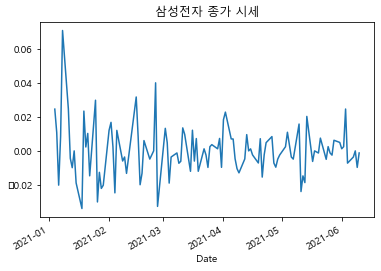

In [19]:
stockData['Change'].plot()
plt.title(comName + " 종가 시세")
plt.show()